In [1]:
# https://s3.amazonaws.com/assets.datacamp.com/production/course_3524/datasets/1_4.png

# Each data point is a customer. The first input is how many accounts they have, and the second input is
# how many children they have. The model will predict how many transactions the user makes in the next year. 
# You will use this data throughout the first 2 chapters of this course.

import numpy as np
from numpy import array

input_data = array([3, 5])
weights = {'node_0': array([2, 4]), 'node_1': array([ 4, -5]), 'output': array([2, 7])}

# Calculate node 0 value: node_0_value
node_0_value = (input_data * weights['node_0']).sum()

# Calculate node 1 value: node_1_value
node_1_value = (input_data * weights['node_1']).sum()

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_value, node_1_value])

# Calculate output: output
output = (hidden_layer_outputs * weights['output']).sum()

# Print output
print(output)

-39


In [2]:
# an "activation function" is a function applied at each node. It converts the node's input into some output.

# The rectified linear activation function (called ReLU) has been shown to lead to very high-performance
# networks. This function takes a single number as an input, returning 0 if the input is negative, and the
# input if the input is positive.

def relu(input):
    '''Define your relu activation function here'''
    # Calculate the value for the output of the relu function: output
    output = max(input, 0)
    
    # Return the value just calculated
    return(output)

# Calculate node 0 value: node_0_output
node_0_input = (input_data * weights['node_0']).sum()
node_0_output = relu(node_0_input)

# Calculate node 1 value: node_1_output
node_1_input = (input_data * weights['node_1']).sum()
node_1_output = relu(node_1_input)

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_output, node_1_output])

# Calculate model output (do not apply relu)
model_output = (hidden_layer_outputs * weights['output']).sum()

# Print model output
print(model_output)

52


In [7]:
# You'll now define a function called predict_with_network() which will generate predictions for multiple
# data observations, which are pre-loaded as input_data. As before, weights are also pre-loaded. In addition,
# the relu() function you defined in the previous exercise has been pre-loaded.
input_data = [array([3, 5]), array([ 1, -1]), array([0, 0]), array([8, 4])]
weights = {'node_0': array([2, 4]), 'node_1': array([ 4, -5]), 'output': array([2, 7])}


# Define predict_with_network()
def predict_with_network(input_data_row, weights):

    # Calculate node 0 value
    node_0_input = (input_data_row * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    # Calculate node 1 value
    node_1_input = (input_data_row * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    # Put node values into array: hidden_layer_outputs
    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    
    # Calculate model output
    input_to_final_layer = (hidden_layer_outputs * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    # Return model output
    return(model_output)


# Create empty list to store prediction results
results = []
for input_data_row in input_data:
    # Append prediction to results
    results.append(predict_with_network(input_data_row,weights))

# Print results
print(results)

[52, 63, 0, 148]


In [4]:
# https://s3.amazonaws.com/assets.datacamp.com/production/course_3524/datasets/ch1ex10.png

input_data = array([3, 5])

weights = {'node_0_0': array([2, 4]),
 'node_0_1': array([ 4, -5]),
 'node_1_0': array([-1,  1]),
 'node_1_1': array([2, 2]),
 'output': array([2, 7])}

def predict_with_network(input_data):
    # Calculate node 0 in the first hidden layer
    node_0_0_input = (input_data * weights['node_0_0']).sum()
    node_0_0_output = relu(node_0_0_input)

    # Calculate node 1 in the first hidden layer
    node_0_1_input = (input_data * weights['node_0_1']).sum()
    node_0_1_output = relu(node_0_1_input)

    # Put node values into array: hidden_0_outputs
    hidden_0_outputs = np.array([node_0_0_output, node_0_1_output])
    
    # Calculate node 0 in the second hidden layer
    node_1_0_input = (hidden_0_outputs * weights['node_1_0']).sum()
    node_1_0_output = relu(node_1_0_input)

    # Calculate node 1 in the second hidden layer
    node_1_1_input = (hidden_0_outputs * weights['node_1_1']).sum()
    node_1_1_output = relu(node_1_1_input)

    # Put node values into array: hidden_1_outputs
    hidden_1_outputs = np.array([node_1_0_output, node_1_1_output])

    # Calculate model output: model_output
    model_output = (hidden_1_outputs * weights['output']).sum()
    
    # Return model_output
    return(model_output)

output = predict_with_network(input_data)
print(output)

364


In [10]:
# https://s3.amazonaws.com/assets.datacamp.com/production/course_3524/datasets/ch2ex4.png

# Its weights have been pre-loaded as weights_0. Your task in this exercise is to update a single weight 
# in weights_0 to create weights_1, which gives a perfect prediction (in which the predicted value
# is equal to target_actual: 3).

# The data point you will make a prediction for
input_data = np.array([0, 3])

# Sample weights
weights_0 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 1]
            }

# The actual target value, used to calculate the error
target_actual = 3

# Make prediction using original weights
model_output_0 = predict_with_network(input_data, weights_0)

# Calculate error: error_0
error_0 = model_output_0 - target_actual

# Create weights that cause the network to make perfect prediction (3): weights_1
weights_1 = {'node_0': [2, 1],
             'node_1': [1, 0],
             'output': [1, 1]
            }

# Make prediction using new weights: model_output_1
model_output_1 = predict_with_network(input_data, weights_1)

# Calculate error: error_1
error_1 = target_actual - model_output_1

# Print error_0 and error_1
print(error_0)
print(error_1)

6
0


In [11]:
# You've seen how different weights will have different accuracies on a single prediction. But usually, 
# you'll want to measure model accuracy on many points. You'll now write code to compare model accuracies 
# for two different sets of weights, which have been stored as weights_0 and weights_1.

# input_data is a list of arrays. Each item in that list contains the data to make a single prediction.
# target_actuals is a list of numbers. Each item in that list is the actual value we are trying to predict.

input_data = [array([0, 3]), array([1, 2]), array([-1, -2]), array([4, 0])]
target_actuals = [1, 3, 5, 7]
weights_0 = {'node_0': array([2, 1]), 'node_1': array([1, 2]), 'output': array([1, 1])}
weights_1 = {'node_0': array([2, 1]), 'node_1': array([ 1. ,  1.5]), 'output': array([ 1. ,  1.5])}


from sklearn.metrics import mean_squared_error

# Create model_output_0 
model_output_0 = []
# Create model_output_0
model_output_1 = []

# Loop over input_data
for row in input_data:
    # Append prediction to model_output_0
    model_output_0.append(predict_with_network(row, weights_0))
    
    # Append prediction to model_output_1
    model_output_1.append(predict_with_network(row, weights_1))

# Calculate the mean squared error for model_output_0: mse_0
mse_0 = mean_squared_error(target_actuals, model_output_0)

# Calculate the mean squared error for model_output_1: mse_1
mse_1 = mean_squared_error(target_actuals, model_output_1)

# Print mse_0 and mse_1
print("Mean squared error with weights_0: %f" %mse_0)
print("Mean squared error with weights_1: %f" %mse_1)

Mean squared error with weights_0: 37.500000
Mean squared error with weights_1: 49.890625


In [12]:
# You're now going to practice calculating slopes. When plotting the mean-squared error loss function 
# against predictions, the slope is 2 * x * (y-xb), or 2 * input_data * error. Note that x and b may have
# multiple numbers (x is a vector for each data point, and b is a vector). In this case, the output will
# also be a vector, which is exactly what you want.

weights = array([0, 2, 1])
input_data = array([1, 2, 3])
target = 0

# Calculate the predictions: preds
preds = (input_data * weights).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = 2 * input_data * error

# Print the slope
print(slope)



[14 28 42]


In [13]:
# You've just calculated the slopes you need. Now it's time to use those slopes to improve your model. 
# If you add the slopes to your weights, you will move in the right direction. However, it's possible
# to move too far in that direction. So you will want to take a small step in that direction first,
# using a lower learning rate, and verify that the model is improving.

# Set the learning rate: learning_rate
learning_rate = 0.01

# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = 2 * input_data * error

# Update the weights: weights_updated
weights_updated = weights - learning_rate * slope

# Get updated predictions: preds_updated
preds_updated = (input_data * weights_updated).sum()

# Calculate updated error: error_updated
error_updated = preds_updated - target

# Print the original error
print(error)

# Print the updated error
print(error_updated)

7
5.04


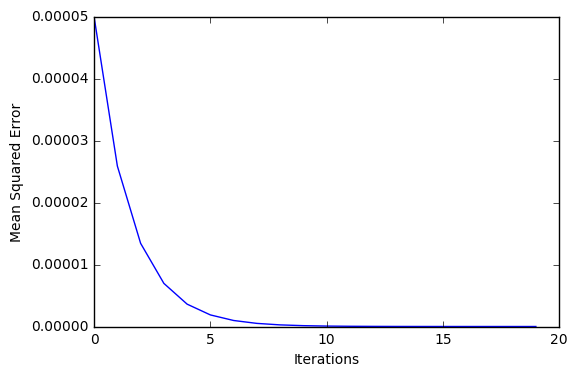

In [16]:
# You're now going to make multiple updates so you can dramatically improve your model weights,
# and see how the predictions improve with each update.
import matplotlib.pyplot as plt

def get_slope(input_data, target, weights):
    error = get_error(input_data, target, weights)
    slope = 2 * input_data * error
    return(slope)

def get_error(input_data, target, weights):
    preds = (weights * input_data).sum()
    error = preds - target
    return(error)

def get_mse(input_data, target, weights):
    errors = get_error(input_data, target, weights)
    mse = np.mean(errors**2)
    return(mse)


n_updates = 20
mse_hist = []

# Iterate over the number of updates
for i in range(n_updates):
    # Calculate the slope: slope
    slope = get_slope(input_data, target, weights)
    
    # Update the weights: weights
    weights = weights - 0.01 * slope
    
    # Calculate mse with new weights: mse
    mse = get_mse(input_data, target, weights)
    
    # Append the mse to mse_hist
    mse_hist.append(mse)

# Plot the mse history
plt.plot(mse_hist)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()


In [18]:
# Now you'll get to work with your first model in Keras, and will immediately be able to run more complex
# neural network models on larger datasets compared to the first two chapters.

# To start, you'll take the skeleton of a neural network and add a hidden layer and an output layer.
# You'll then fit that model and see Keras do the optimization so your model continually gets better.

# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]

# Set up the model: model
model = Sequential()

# Add the first layer
model.add(Dense(50, activation='relu', input_shape=(n_cols,)))

# Add the second layer
model.add(Dense(32, activation='relu'))


# Add the output layer
model.add(Dense(1))

Using TensorFlow backend.


ImportError: cannot import name 'scikit_learn'

In [19]:
# You're now going to compile the model you specified earlier. To compile the model, you need to
# specify the optimizer and loss function to use. In the video, Dan mentioned that the Adam optimizer
# is an excellent choice. You can read more about it as well as other keras optimizers here, and if
# you are really curious to learn more, you can read the original paper that introduced the Adam optimizer.

# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential

# Specify the model
n_cols = predictors.shape[1]
model = Sequential()
model.add(Dense(50, activation='relu', input_shape = (n_cols,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Verify that model contains information from compiling
print("Loss function: " + model.loss)

NameError: name 'predictors' is not defined

In [ ]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential

# Specify the model
n_cols = predictors.shape[1]
model = Sequential()
model.add(Dense(50, activation='relu', input_shape = (n_cols,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model.fit(predictors, target)